In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


In [54]:
# Load the dataset
df = pd.read_csv('weatherAUS.csv')

In [82]:
# Explore the dataset
print("First 5 rows of the dataset:")
print(df.head(5))

First 5 rows of the dataset:
      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049         4     17.9     35.2       0.0         12.0      12.3   
6050         4     18.4     28.9       0.0         14.8      13.0   
6052         4     19.4     37.6       0.0         10.8      10.6   
6053         4     21.9     38.4       0.0         11.4      12.2   
6054         4     24.2     41.0       0.0         11.2       8.4   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
6049           11           48.0           1          12  ...       1004.4   
6050            8           37.0          10          10  ...       1012.1   
6052            5           46.0           5           6  ...       1009.2   
6053           14           31.0          14          15  ...       1009.1   
6054           14           35.0           7          14  ...       1007.4   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
6049      

In [56]:
print("\nShape of the dataset:", df.shape)



Shape of the dataset: (145460, 23)


In [57]:
print("\nColumns in the dataset:", df.columns)



Columns in the dataset: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [58]:
print("\nChecking for null values:")
print(df.isnull().sum())


Checking for null values:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [59]:
print("\nNumber of unique values in each column:")
print(df.nunique())


Number of unique values in each column:
Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64


In [60]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

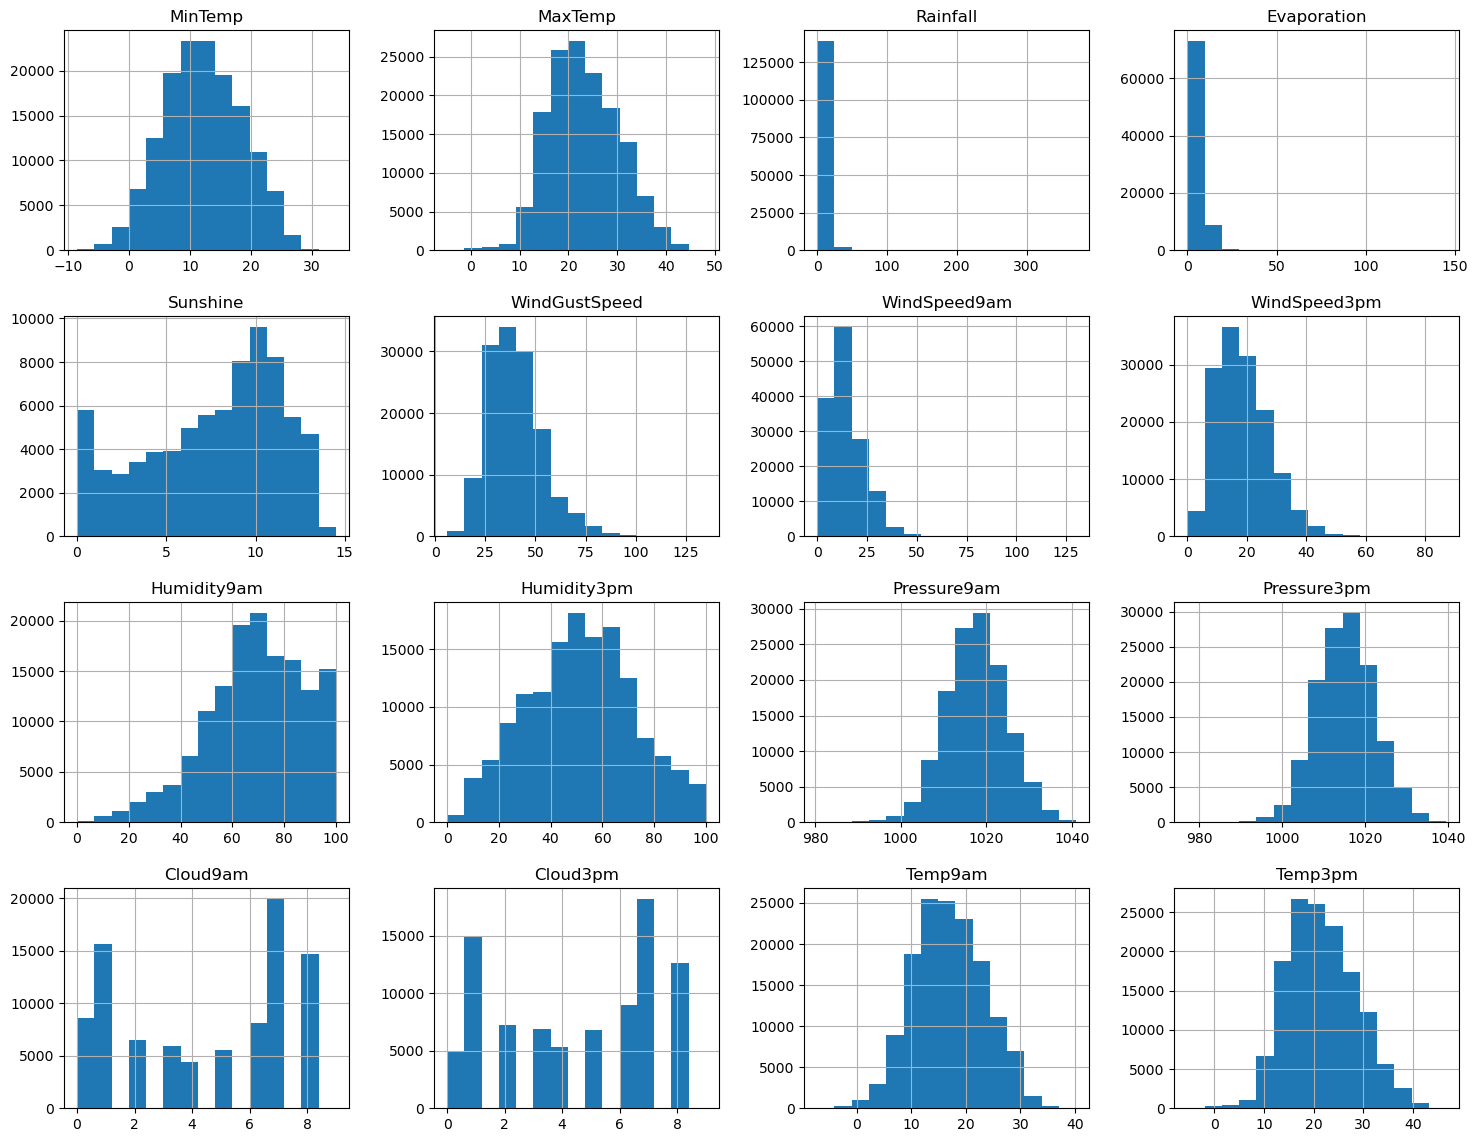

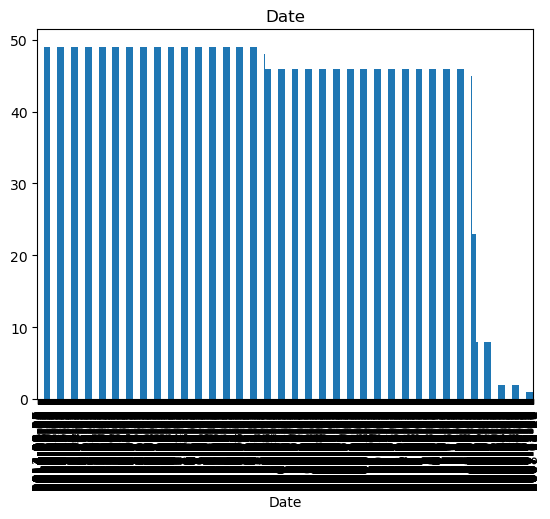

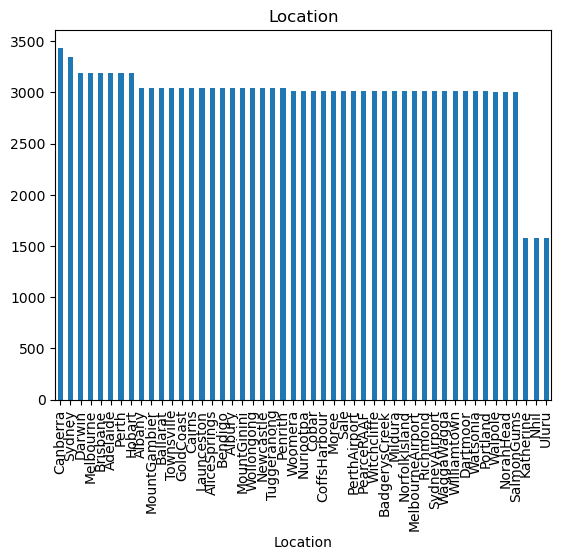

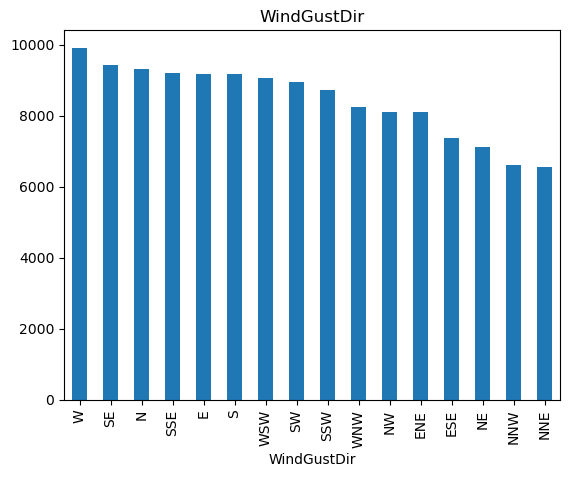

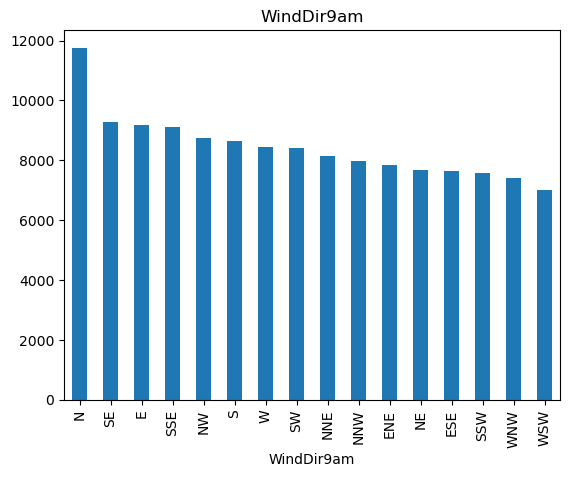

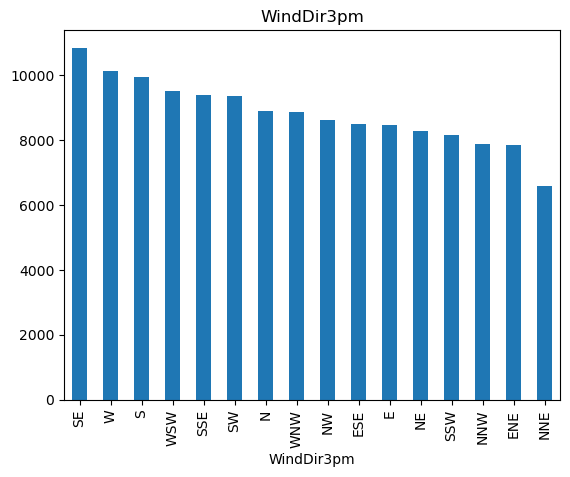

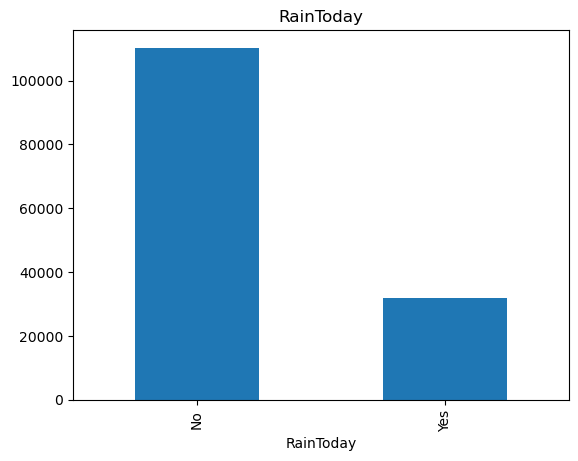

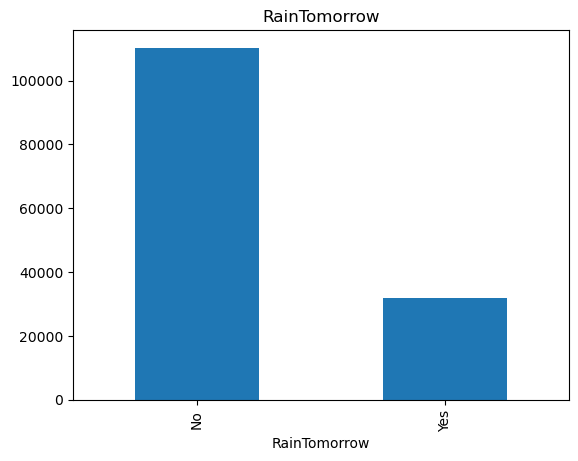

In [61]:
# Histograms for numerical features
df.hist(bins=15, figsize=(18, 14))
plt.show()

# Bar charts for categorical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


In [62]:
# Basic data cleaning
df.dropna(subset=['RainTomorrow'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(keep='first', inplace=True)

In [63]:
# Label encoding for categorical variables
categorical = [var for var in df.columns if df[var].dtype == 'O']
label_encoder = LabelEncoder()
for col in categorical:
    df[col] = label_encoder.fit_transform(df[col])

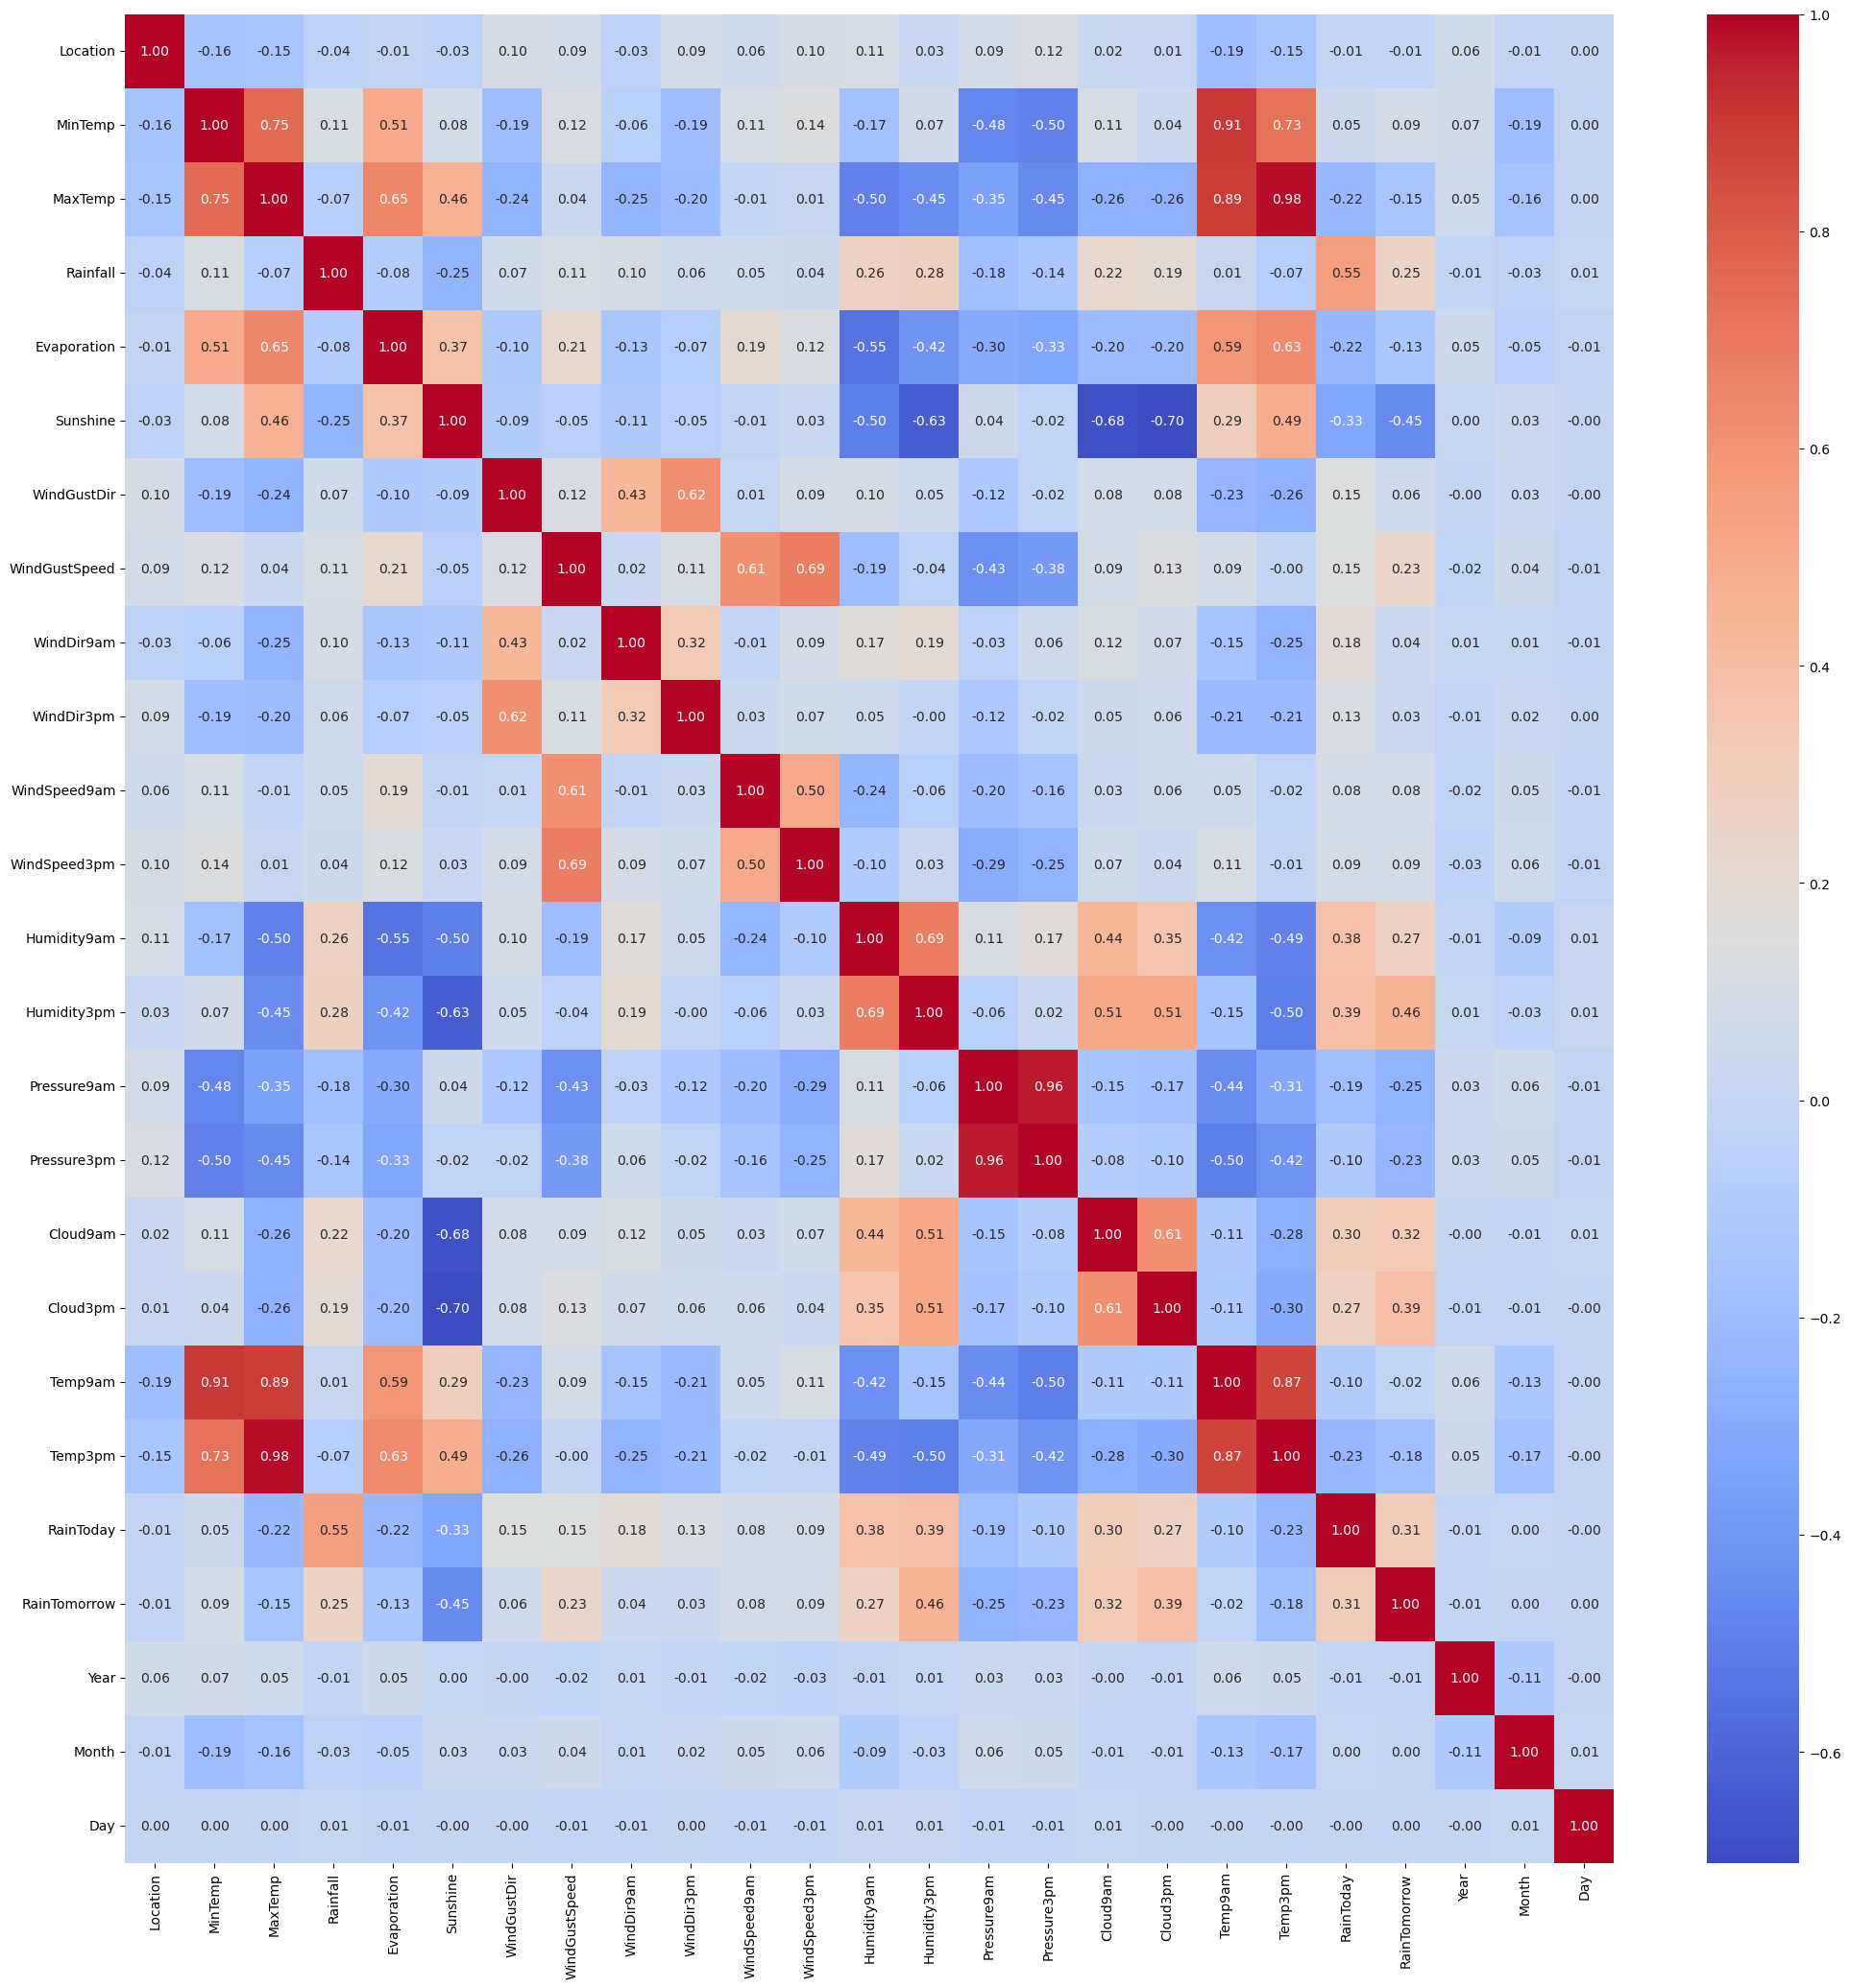

In [64]:
# Visualize the data (add specific plots as needed)
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

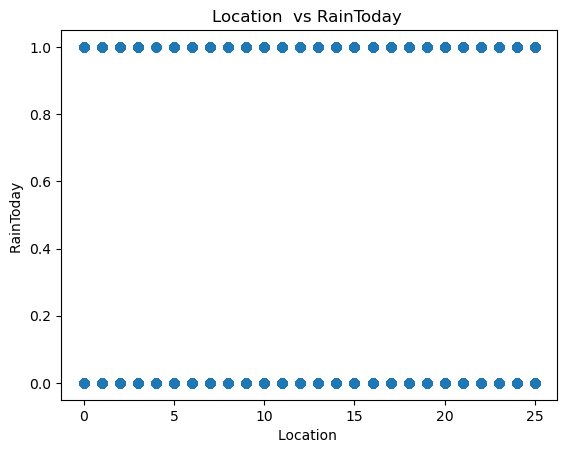

In [65]:
# Scatter plots for key variables
# Replace 'feature1', 'feature2', etc. with your actual feature names
plt.scatter(df['Location'], df['RainToday'])
plt.xlabel('Location ')
plt.ylabel('RainToday ')
plt.title('Location  vs RainToday ')
plt.show()


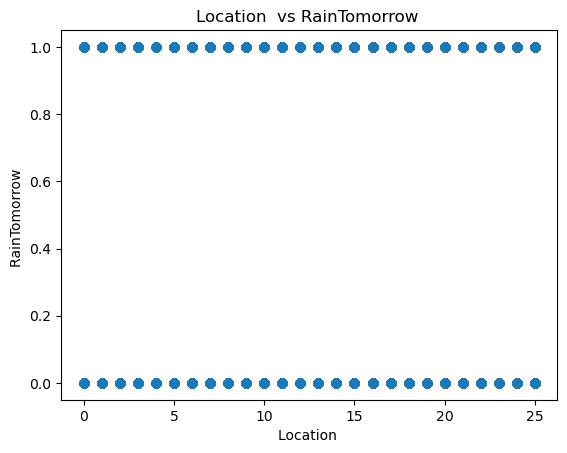

In [66]:
# Scatter plots for key variables
# Replace 'feature1', 'feature2', etc. with your actual feature names
plt.scatter(df['Location'], df['RainTomorrow'])
plt.xlabel('Location ')
plt.ylabel('RainTomorrow ')
plt.title('Location  vs RainTomorrow ')
plt.show()


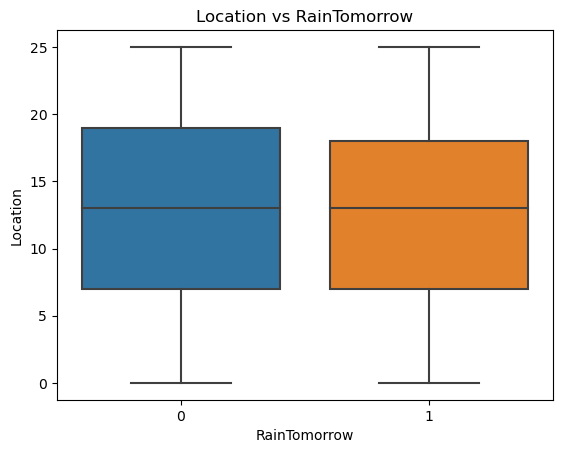

In [67]:
# Specific Relationships (e.g., between a feature and target)
# Replace 'feature' and 'RainTomorrow' with your actual column names
sns.boxplot(x='RainTomorrow', y='Location', data=df)
plt.title('Location vs RainTomorrow')
plt.show()


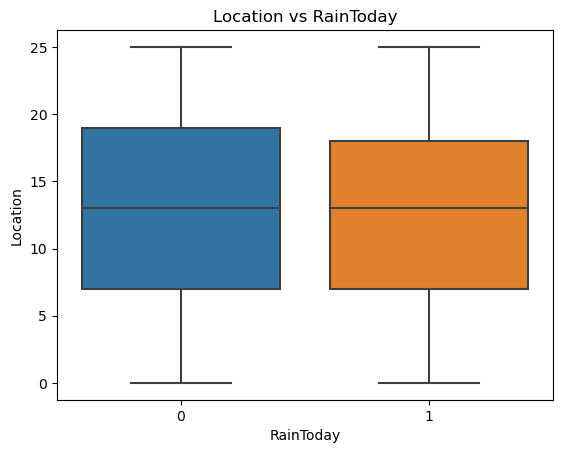

In [83]:
# Specific Relationships (e.g., between a feature and target)
# Replace 'feature' and 'RainTomorrow' with your actual column names
sns.boxplot(x='RainToday', y='Location', data=df)
plt.title('Location vs RainToday')
plt.show()

In [68]:
# Split the dataset
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [69]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=10000, solver='saga'),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'MLPClassifier': MLPClassifier(max_iter=1000)
}

In [71]:
# Train and evaluate models with default parameters (without scaling)
default_accuracies = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    default_accuracies[name] = accuracy
    print(f'{name} - Default Accuracy: {accuracy:.2f}')

LogisticRegression - Default Accuracy: 0.85
DecisionTree - Default Accuracy: 0.80
RandomForest - Default Accuracy: 0.86
GaussianNB - Default Accuracy: 0.80
MLPClassifier - Default Accuracy: 0.86


In [72]:
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} - Cross-Validated Accuracy: {np.mean(cv_scores):.2f}")


LogisticRegression - Cross-Validated Accuracy: 0.85
DecisionTree - Cross-Validated Accuracy: 0.80
RandomForest - Cross-Validated Accuracy: 0.86
GaussianNB - Cross-Validated Accuracy: 0.80
MLPClassifier - Cross-Validated Accuracy: 0.86


In [73]:
# Define the hyperparameter grid for each classifier
param_grids = {
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10, 100]},
    'DecisionTree': {'max_depth': [None, 2, 4, 6, 8, 10, 12]},
    'RandomForest': {'n_estimators': [10, 50, 100, 200]},
    'GaussianNB': {},
    'MLPClassifier': {'hidden_layer_sizes': [(50,), (100,), (50,50)], 'alpha': [0.0001, 0.001, 0.01]}
}

# Train and evaluate models with hyperparameter tuning
tuned_models = {}
tuned_accuracies = {}
for name, model in models.items():
    param_grid = param_grids[name]

    # If param_grid is not empty, proceed with GridSearch
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)

    # Predictions and Evaluation
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    tuned_accuracies[name] = accuracy
    print(f'{name} Best Parameters: ', best_model.get_params())
    print(f'{name} Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print(f'{name} Classification Report:\n', classification_report(y_test, y_pred))
    print(f'{name} - Accuracy: {accuracy:.2f}')
    if hasattr(best_model, "predict_proba"):
        print(f"{name} - ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1]):.2f}")

    # Store the best model in the dictionary
    tuned_models[name] = best_model


LogisticRegression Best Parameters:  {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
LogisticRegression Confusion Matrix:
 [[16562   938]
 [ 2353  2715]]
LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     17500
           1       0.74      0.54      0.62      5068

    accuracy                           0.85     22568
   macro avg       0.81      0.74      0.77     22568
weighted avg       0.85      0.85      0.85     22568

LogisticRegression - Accuracy: 0.85
LogisticRegression - ROC AUC: 0.88
DecisionTree Best Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decreas

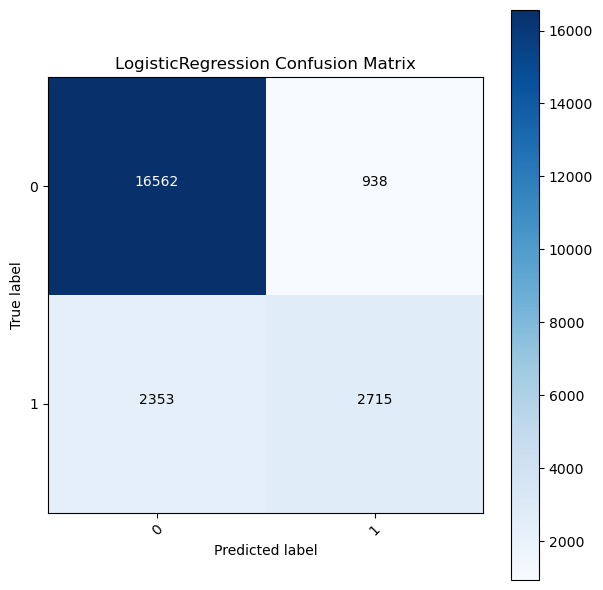

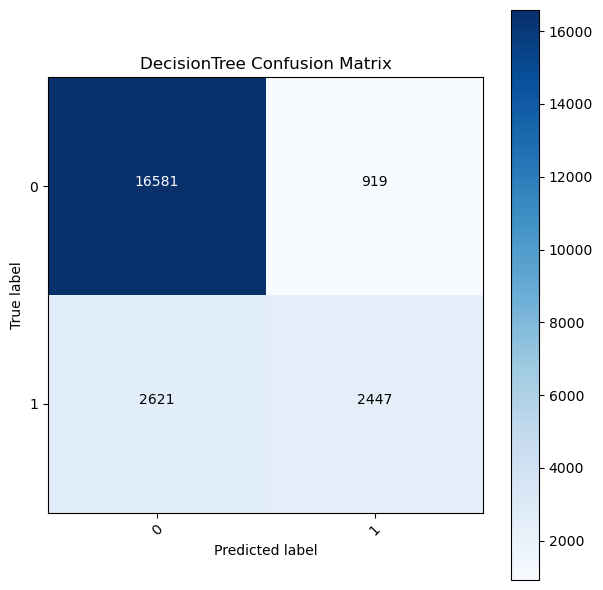

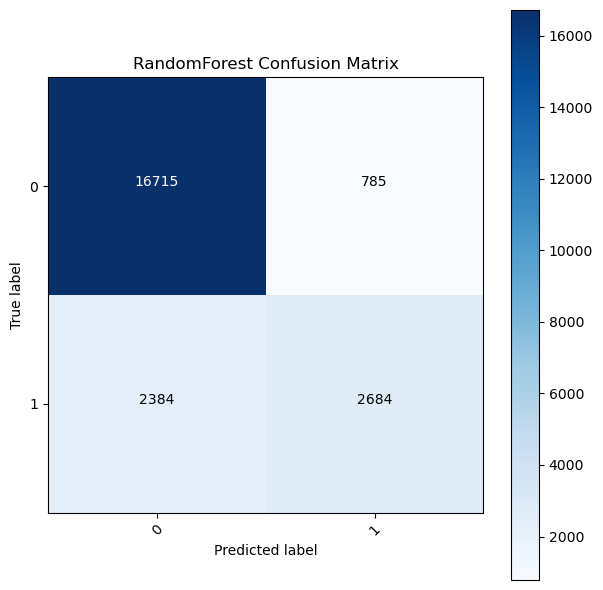

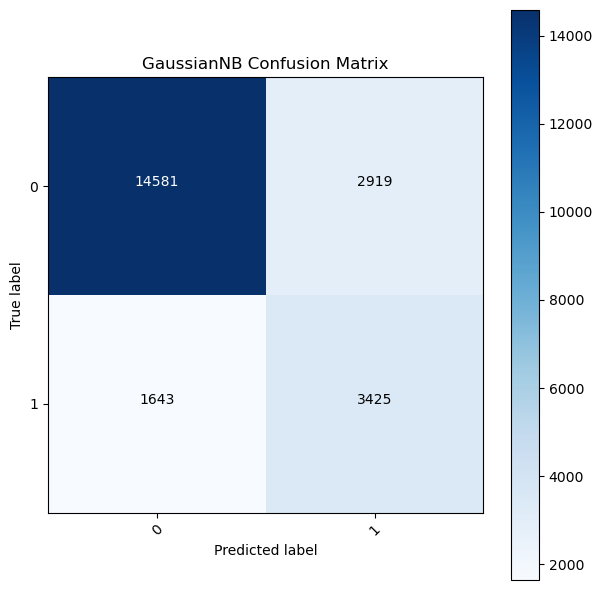

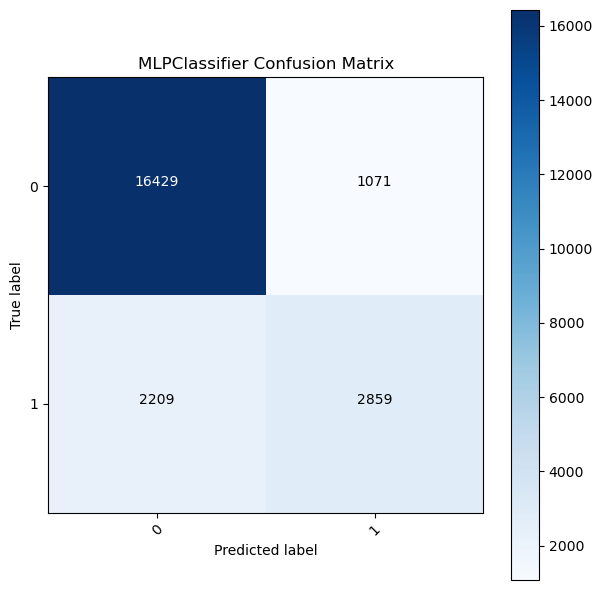

In [74]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Use tuned_models for evaluations
for name, model in tuned_models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    plot_confusion_matrix(cm, classes=np.unique(y_test), title=f'{name} Confusion Matrix')
    plt.show()

In [75]:
for name, model in tuned_models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} - Cross-Validated Accuracy: {np.mean(cv_scores):.2f}")


LogisticRegression - Cross-Validated Accuracy: 0.85
DecisionTree - Cross-Validated Accuracy: 0.85
RandomForest - Cross-Validated Accuracy: 0.86
GaussianNB - Cross-Validated Accuracy: 0.80
MLPClassifier - Cross-Validated Accuracy: 0.86


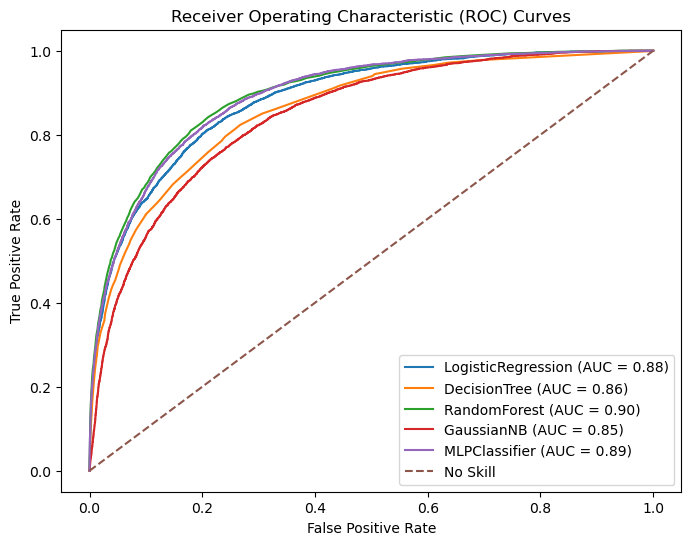

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Iterate through each model to calculate and plot their ROC curves
for name, model in tuned_models.items():
    if hasattr(model, "predict_proba"):
        # Predict probabilities for the positive class
        y_probs = model.predict_proba(X_test_scaled)[:, 1]

        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)

        # Calculate the AUC
        roc_auc = roc_auc_score(y_test, y_probs)

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot baseline (No Skill Classifier)
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")

# Show the plot
plt.show()


LogisticRegression:
 Training Score: 0.85
 Test Score: 0.85


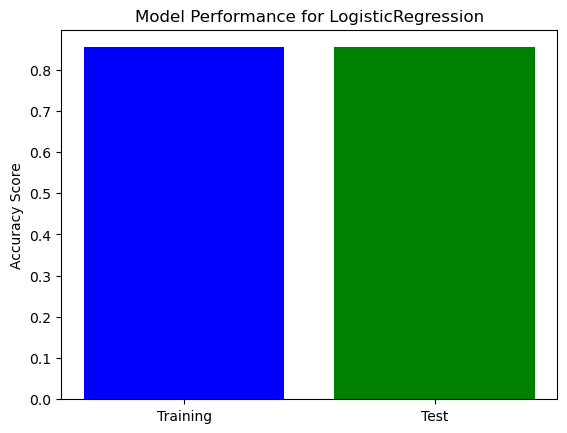

DecisionTree:
 Training Score: 0.86
 Test Score: 0.84


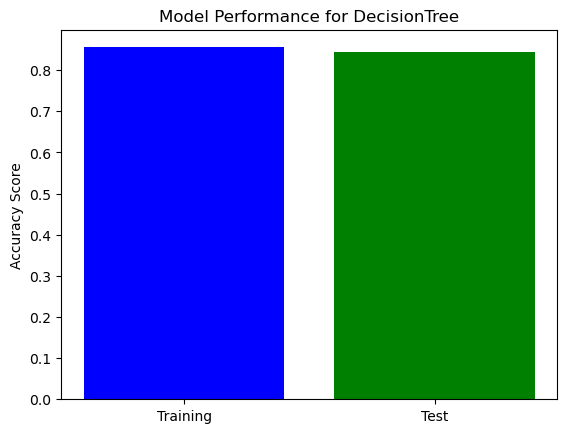

RandomForest:
 Training Score: 1.00
 Test Score: 0.86


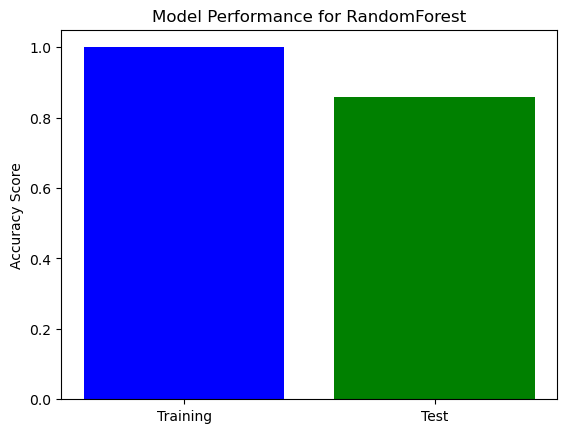

GaussianNB:
 Training Score: 0.80
 Test Score: 0.80


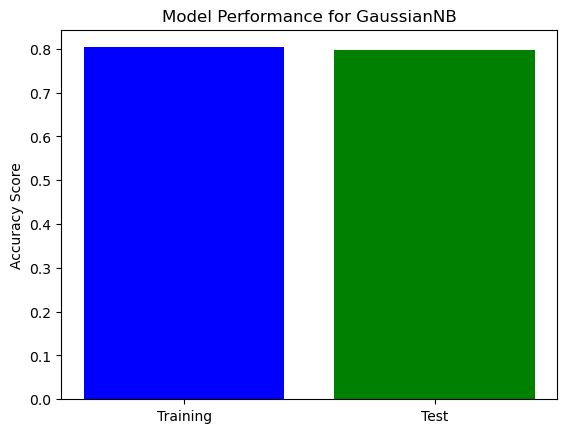

MLPClassifier:
 Training Score: 0.88
 Test Score: 0.85


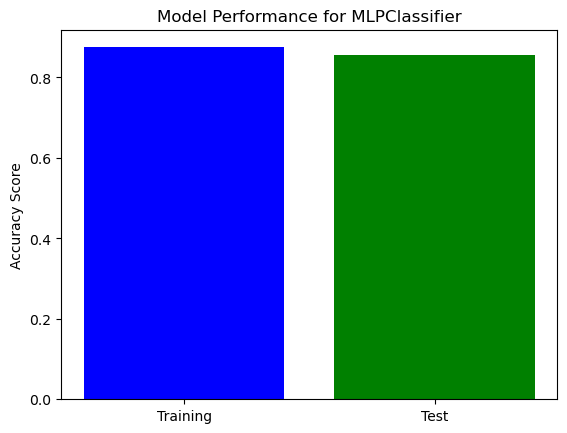

In [77]:
for name, model in tuned_models.items():
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name}:")
    print(f" Training Score: {train_score:.2f}")
    print(f" Test Score: {test_score:.2f}")

    # Visual representation
    plt.bar(['Training', 'Test'], [train_score, test_score], color=['blue', 'green'])
    plt.title(f'Model Performance for {name}')
    plt.ylabel('Accuracy Score')
    plt.show()


In [78]:
print("Accuracy Comparison:")
for name in models.keys():
    default_acc = default_accuracies.get(name, "N/A")
    tuned_acc = tuned_accuracies.get(name, "N/A")
    print(f'{name}: Default - {default_acc}, Tuned - {tuned_acc}')


Accuracy Comparison:
LogisticRegression: Default - 0.8535093938319744, Tuned - 0.854174051754697
DecisionTree: Default - 0.7962158808933002, Tuned - 0.8431407302375045
RandomForest: Default - 0.858472172988302, Tuned - 0.8595799361928395
GaussianNB: Default - 0.7978553704360156, Tuned - 0.7978553704360156
MLPClassifier: Default - 0.8594026940801134, Tuned - 0.8546614675646934


In [80]:
for name, model in models.items():
    # Train accuracy
    train_accuracy = model.score(X_train_scaled, y_train)
    # Test accuracy
    test_accuracy = model.score(X_test_scaled, y_test)

    # Calculate the difference between train and test accuracy
    accuracy_difference = train_accuracy - test_accuracy

    # Check for underfitting or overfitting
    if abs(accuracy_difference) < 0.05:
        status = "Good fit"
    elif accuracy_difference > 0:
        status = "Possibly overfitting"
    else:
        status = "Possibly underfitting"

    print(f"{name}:")
    print(f" Training Accuracy: {train_accuracy:.2f}")
    print(f" Test Accuracy: {test_accuracy:.2f}")
    print(f" Status: {status}\n")


LogisticRegression:
 Training Accuracy: 0.85
 Test Accuracy: 0.85
 Status: Good fit

DecisionTree:
 Training Accuracy: 1.00
 Test Accuracy: 0.80
 Status: Possibly overfitting

RandomForest:
 Training Accuracy: 1.00
 Test Accuracy: 0.86
 Status: Possibly overfitting

GaussianNB:
 Training Accuracy: 0.80
 Test Accuracy: 0.80
 Status: Good fit

MLPClassifier:
 Training Accuracy: 0.87
 Test Accuracy: 0.86
 Status: Good fit

